In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import QHD.QHD_dataloader as DL
import QHD.QHD_basis as HDB
import QHD.QHD_encoder as HDE
import QHD.QHD_reg as QHDReg

In [2]:
D = 10000
EPOCH = 100
BITS = 3
STD = 0.

In [3]:
with open('current_matrix.json', 'r', encoding='utf8') as f:
  curr_matrices = json.load(f)

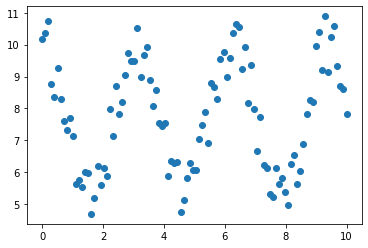

In [4]:
x = np.linspace(0, 10, 100)

func = lambda x: 10*np.cos(np.sin(x))

delta = np.random.uniform(-1, 1, x.size)
y = func(x) + delta


plt.scatter(x, y)
plt.show()

In [5]:
x = x.reshape((-1, 1))

In [6]:
hdb = HDB.HD_basis(D, 1)
basis = hdb.getBasis()
hde = HDE.HD_encoder(basis)
xencoded = hde.encodeData(x)

Generating vanilla HD basis of shape... 

vectors:   0%|          | 0/10000 [00:00<?, ?it/s]

(10000, 1)
Encoding time: 0.14664483070373535 
Encoding data of shape (100, 1)


samples encoded:   0%|          | 0/100 [00:00<?, ?it/s]

Time spent: 0 sec


In [7]:
def plot_mse_by_epoch(history):

  plt.figure(figsize=(10, 7), dpi=80)
  plt.plot(history)
  plt.xlabel('epoch')
  plt.ylabel('MSE')
  plt.show()

def plot_predictions(x, y, pred):

  plt.figure(figsize=(10, 7), dpi=80)
  plt.scatter(x, y, label='datapoints')
  plt.plot(x, pred, color='orange', label='prediction')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def test_full(dim, num_epoch, x, xencoded, y):
  
  model = QHDReg.QHD_reg(dim, -1)

  history = []

  for epoch in range(num_epoch):
    train_mse = model.itr_train(xencoded, y, lr=0.0001)

    #print(train_mse)
    history.append(train_mse)
  
  plt.hist(model.model)
  plt.show()
  
  plot_mse_by_epoch(history)
  plot_predictions(x, y, [model.predict(x_) for x_ in xencoded])

def test_quant_dotprod(dim, bits, num_epoch, x, xencoded, y, lr=0.0001, quant_norm=False, fix_quant_std=None):
  
  model = QHDReg.QHD_reg(dim, bits, quant_norm=quant_norm, fix_quant_std=fix_quant_std)

  history = []

  for epoch in range(num_epoch):
    train_mse = model.itr_train(xencoded, y, lr=lr)
    model.model_projection()

    #print(train_mse)
    history.append(train_mse)
  
  plt.hist(model.quantized_model)
  plt.show()

  plot_mse_by_epoch(history)
  plot_predictions(x, y, [model.predict(x_) for x_ in xencoded])

def test_quant_current(dim, bits, std, mapping, num_epoch, x, xencoded, y, lr=0.0001):
  
  model = QHDReg.QHD_reg(dim, bits)

  history = []

  for epoch in range(num_epoch):
    train_mse = model.itr_train(xencoded, y, std=std, mapping=mapping, lr=lr)
    model.model_projection()

    #print(train_mse)
    history.append(train_mse)


  plot_mse_by_epoch(history)
  plot_predictions(x, y, [model.predict(x_, std=STD, mapping=mapping) for x_ in xencoded])


## Full precision

4.809629583961266
0.45542142167796024
0.4588961658570572
0.3700154266710367
0.4894715054243842
0.433276795628579
0.4707283856260876
0.42392983248796895
0.4427174021933988
0.44312447021342655
0.45617687404430945
0.44172781372818826
0.4810393466704374
0.4344745244760727
0.4489003039972978
0.4285782343675129
0.4555455104353324
0.4280821436378999
0.4630362751493146
0.4622188381067654
0.3799060886939916
0.4586622063676093
0.4520458052424228
0.44229487600359535
0.4359668513664417
0.3719749917355053
0.4478541737043649
0.42132412058726443
0.4427249444352925
0.4169257520992482
0.45018034235980386
0.4026358893912127
0.4076803819846998
0.4273221397077123
0.42679013714351294
0.444542956769945
0.3809683942472129
0.39079465499719823
0.4563722486844048
0.4180572427836162
0.44104203728232755
0.4236161050051056
0.43347158416085896
0.432193856847369
0.42559555676071775
0.42888913593608513
0.3908568302411972
0.4621189895400954
0.3953399673134554
0.43305601865175675
0.4210398545028691
0.4514417217759158
0

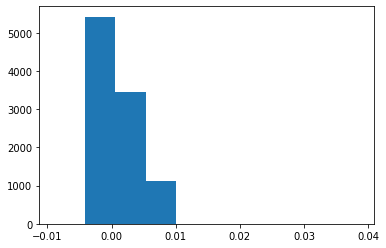

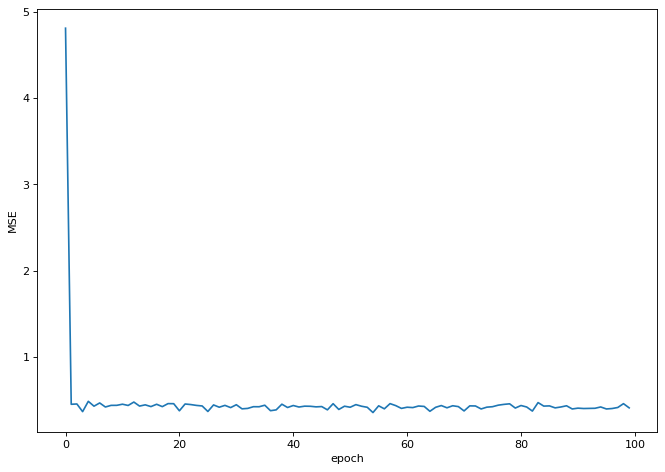

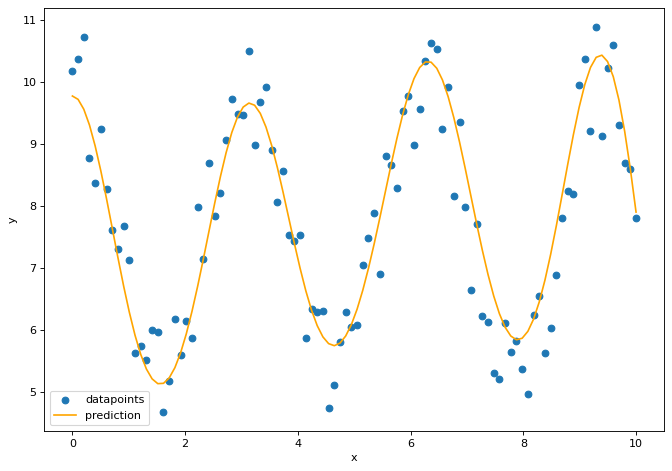

In [8]:
test_full(D, EPOCH, x, xencoded, y)

## QuantHD with dot product

63.30054287995836
18315412125.550236
14129695463.619566
13899171966.953398
13926912813.955463
13940477081.303728
13943063243.962221
13948001102.138758
13947368832.964794
13945728754.72829
13945907541.857536
13947875114.482124
13950634275.426975
13951481589.761988
13955007080.810158
13954749237.62917
13954077991.269526
13954805617.943666
13955520607.299614
13954792804.56765
13954792804.567654
13955428367.921413
13955274955.29336
13954413869.882645
13954296093.179338
13955024034.744436
13954235091.54261
13953544262.646492
13953388228.446375
13953388228.446373
13952527249.355663
13950397253.570274
13950397253.570278
13949524613.017221
13948663785.466509
13947457592.012173
13947457592.012175
13947457592.012182
13946766964.996078
13946766964.996077
13946766964.99607
13946766964.99607
13946766964.996075
13946766964.99607
13947614092.891085
13948318966.361675
13949166152.65668
13949166152.65668
13949166152.656685
13949166152.656683
13949166152.65668
13949166152.656683
13949166152.656685
13949

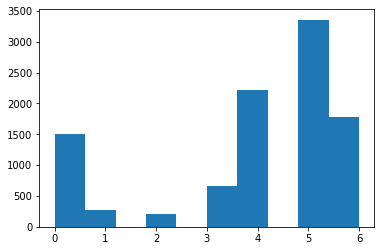

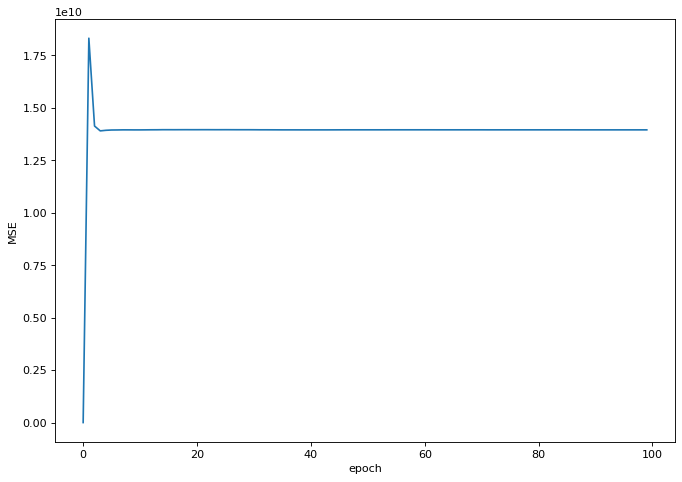

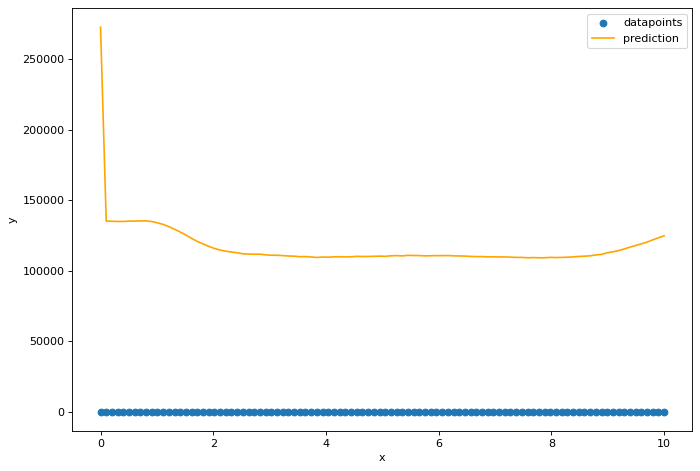

In [9]:
test_quant_dotprod(D, 3, EPOCH, x, xencoded, y, lr=0.0001)

63.300542879958385
373446151369.3951
303299073877.7256
302773940302.7086
303046762043.3636
303135402451.6591
303198828869.5869
303260761629.49304
303233165382.9858
303224670900.75494
303259405536.80475
303276650957.96906
303281834572.4596
303280446403.1856
303256913173.7684
303259427639.4168
303265150761.8738
303272918302.7874
303270015429.75806
303241882941.6179
303231904723.2621
303215457698.53827
303229299586.36127
303229299586.3613
303236459689.51746
303212959597.4923
303197388563.14185
303204479887.6819
303190199768.648
303210243734.021
303203519847.8093
303202902678.1688
303196165000.11176
303194205212.5555
303194205212.5554
303194205212.5556
303202248024.63885
303208900094.9105
303208900094.91064
303209157703.10626
303217200762.4698
303217200762.46954
303217200762.4697
303210556377.83984
303201955132.9052
303201955132.90515
303209078288.18884
303209078288.1887
303209078288.18866
303200477110.8142
303200477110.8141
303193832958.96423
303193832958.96423
303193832958.9641
303200924

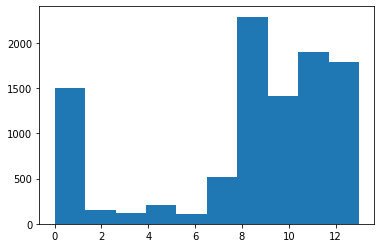

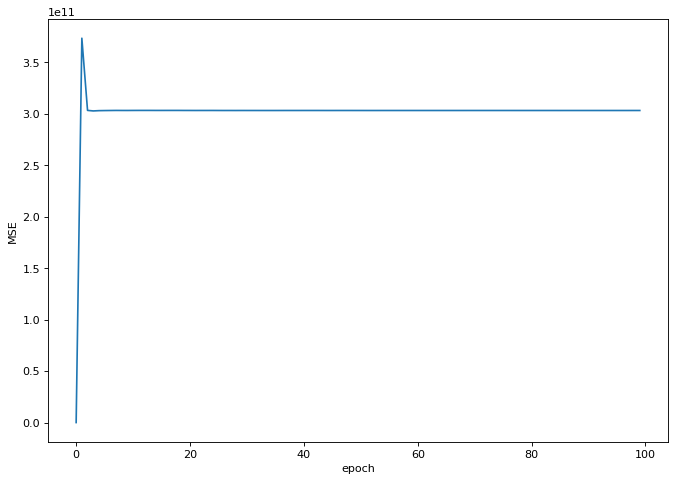

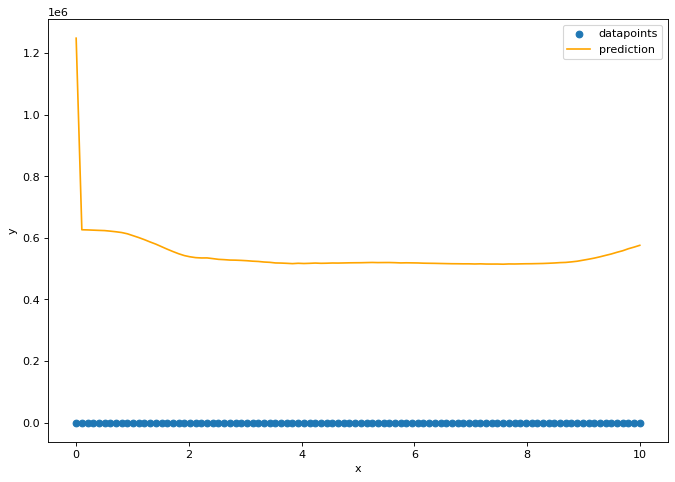

In [10]:
test_quant_dotprod(D, 4, EPOCH, x, xencoded, y, lr=0.0001)

63.300542879958336
3.090857685132202e+16
2.5392063531886976e+16
2.5409280867972084e+16
2.5417560166602892e+16
2.5420886569113016e+16
2.542116984193285e+16
2.5421305463114336e+16
2.5421946561236772e+16
2.542133682708497e+16
2.5420697742451516e+16
2.542210701784954e+16
2.5422145729067844e+16
2.5422119317476212e+16
2.5422851281918704e+16
2.54224869700397e+16
2.542234519164206e+16
2.542226416555203e+16
2.5422515702820188e+16
2.5422847983120476e+16
2.5422588373114108e+16
2.5422784803806212e+16
2.5422805080557332e+16
2.5422900728777196e+16
2.542288880212661e+16
2.542285879670328e+16
2.5422928239771516e+16
2.5423210156553012e+16
2.5423095662590944e+16
2.542350919380475e+16
2.5423632907615676e+16
2.542385571931149e+16
2.542369842579981e+16
2.5423609015043384e+16
2.5423597612369028e+16
2.542349986141842e+16
2.5423252315577616e+16
2.5423240175095628e+16
2.542333420455645e+16
2.542353216018532e+16
2.5423597086308756e+16
2.5423811039751868e+16
2.5423765467962892e+16
2.542379872341009e+16
2.5423801

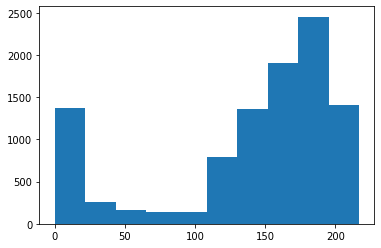

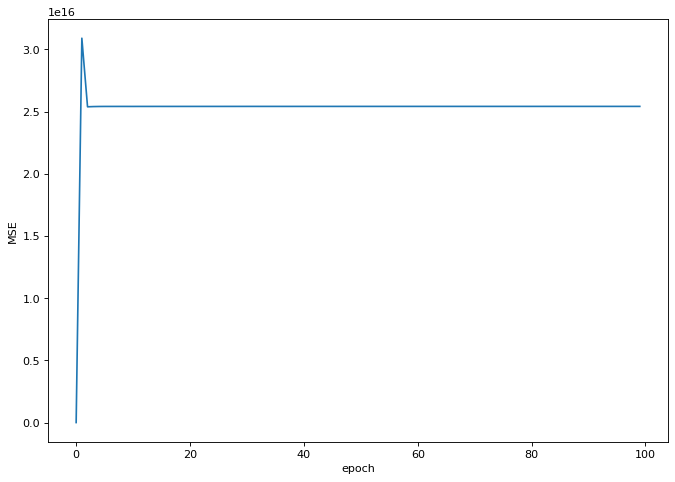

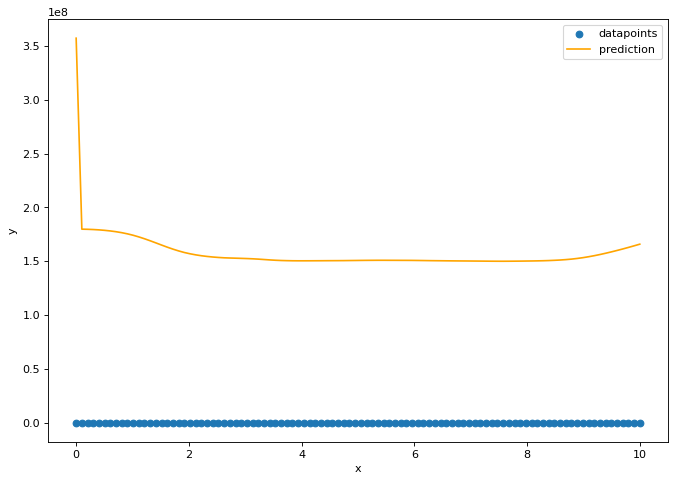

In [11]:
test_quant_dotprod(D, 8, EPOCH, x, xencoded, y, lr=0.0001)

## QuantHD with dot product (normalized [-1, 1])

In [ ]:
test_quant_dotprod(D, 4, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True)

In [ ]:
test_quant_dotprod(D, 8, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True)

In [12]:
test_quant_dotprod(D, 16, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True)

63.30054287995836
2355192.3938144636
2487543.0298852553
2670864.858982919
3190610.7197514544
2606739.402609796
2836565.866957347
2991050.362986581
3038751.6427283348
3025329.871428442
3083060.939677822
3062658.916209771
3112119.59336198
3084838.2643586425
3130984.0700118844
3100279.9204348004
3143341.348687219
3110261.1497816388
3151134.735719384
3116667.8559725992
3156029.5732633197
3120797.9429661063
3159145.1045735013
3123504.4513912513
3161174.550484983
3125312.3332943562
3162530.4489098997
3126551.8414849304
3163465.1770301946
3127426.5792644084
3164129.2280409015
3128064.955079552
3164624.879109936
3128550.270487337
3165003.1609415286
3128934.6129040886
3165308.621582726
3129252.6731789517
3165569.507503292
3129528.8120715516
3165798.153974883
3129772.614707376
3166006.511595464
3130001.1131529724
3166200.777619417
3130215.725895272
3166386.107375536
3130422.8441267144
3166565.111442173
3130620.2999343723
3166739.3437963785
3130814.861056064
3166911.6837404203


KeyboardInterrupt: 

## QuantHD with dot product (normalized [-1, 1] + fixed standard deviation)

In [ ]:
test_quant_dotprod(D, 4, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True, fix_quant_std=32)

In [ ]:
test_quant_dotprod(D, 8, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True, fix_quant_std=32)

62.87929259086454
61.95377197057993
61.04305991813152
60.14626876659178
59.263680783646905
58.39459239637073
57.539308948929055
56.69716675011994
55.86761857292688
55.051052715713915
54.247516108947295
53.4564055594646
52.67770149806705
51.91076998966572
51.15585737460059
50.412848238303326
49.68127834249795
48.96086279876607
48.25139420106441
47.55360994549761
46.866249778299924
46.18981490717153
45.52360133475852
44.867843237206216
44.22221602788291
43.58652227210139
42.96091743346344
42.34484485414039
41.73825228262461
41.14116242715289
40.55342028430174
39.974728112163
39.40490016736238
38.84394865049437
38.29169301847893
37.747996820089426
37.21241639914973
36.68538815890673
36.166559969679035
35.65562300663318
35.152556016517075
34.657363786771164
34.1697989847687
33.689684469919776
33.21702280827722
32.751512637514054
32.29341680098943
31.842296260093644
31.398194624576632
30.960891171092875
30.530276498383127
30.106344712827923
29.688847723279583
29.27776775236185
28.8729701301

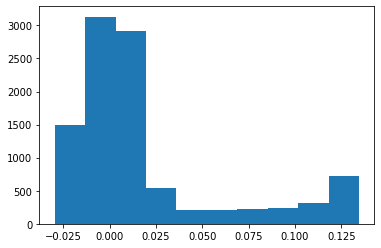

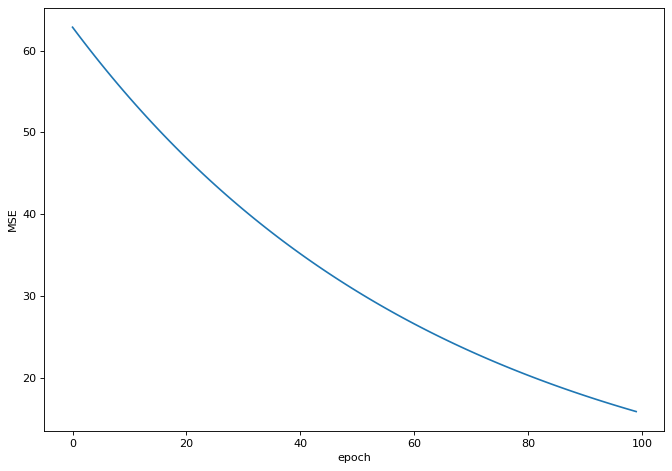

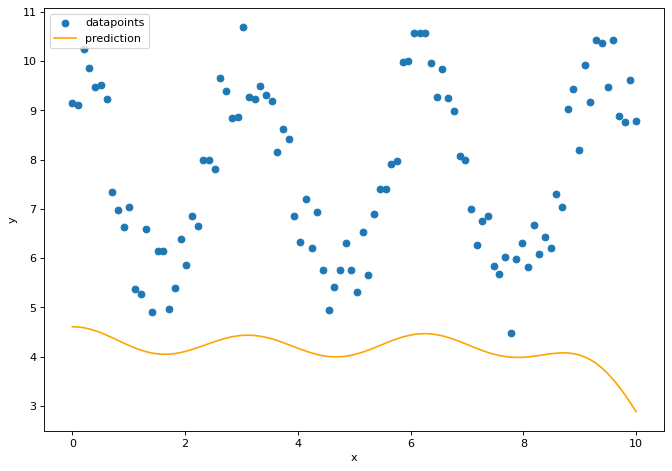

In [ ]:
test_quant_dotprod(D, 16, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True, fix_quant_std=32)

## QuantHD with current matrix

782883541.5281035
516449384.25006056
511976817.8340938
512250613.17316544
512196894.4606386
512110620.92032224
512157724.0063463
512125146.0342827
512062580.084917
512115416.0536448
512181424.48307717
512094644.5172269
512108378.31934375
512138489.5458186
512132340.1996318
512099638.1622883
512095894.9818277
511940845.12985456
512051295.0595704
512081856.4534208
512063876.50613916
512154074.32092935
512183686.62129176
512132009.8838531
512114924.8345544
512098236.24419993
512113878.7268965
512043877.40296453
512075184.55102813
512091032.78738517
512106693.2764077
512089684.9158172
512072468.3501554
512072468.3501552
512088129.93527496
512120399.0809721
512069396.18538785
512069396.185388
512069396.1853878
512036245.00058115
512084418.0377116
512099927.48391104
512082851.6222702
512082851.62227005
512082851.6222702
512045640.2447251
512028797.9773022
512011724.8855024
511994884.2745245
511994884.27452445
511994884.2745245
511994884.2745246
511994884.2745245
512027550.3483568
512027550.3

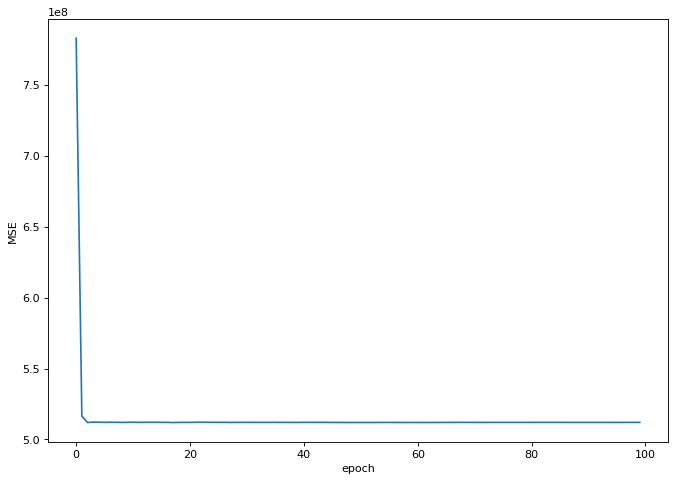

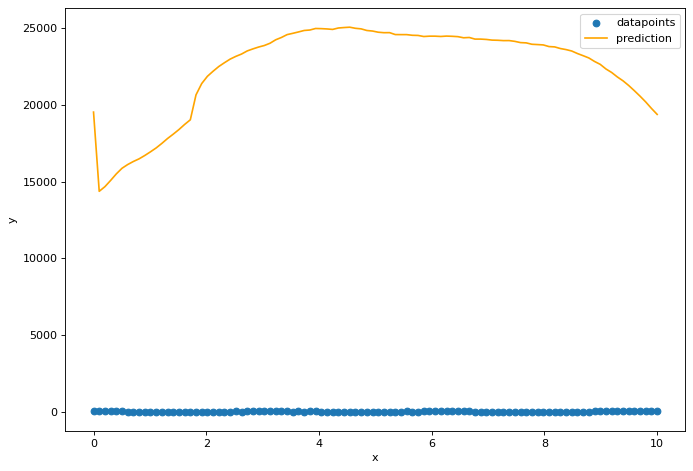

In [ ]:
test_quant_current(D, 3, STD, curr_matrices['3'], EPOCH, x, xencoded, y, lr=0.0001)

711961630.2629652
406849123.20785993
403869641.51369256
403474854.43292296
403480402.7208609
403426478.99448997
403361649.24664533
403025418.2210461
402725848.766042
402366441.7031212
401747758.6757901
401664316.42038566
401593374.5655362
401604246.73404527
401600180.89093244
401620406.5081563
401672032.22814316
401654876.33807313
401650254.5428597
401662288.32544756
401656706.75352883
401627506.4390661
401628402.1070214
401597267.1145053
401605087.23625124
401637727.73638225
401629363.03420043
401621146.77289736
401640088.9984859
401584981.51893646
401592744.0466522
401627847.6758551
401622702.423191
401638518.8677147
401619855.4270647
401618770.779982
401596631.5654805
401585932.0571648
401611164.9950717
401605622.3261737
401601953.62371093
401595072.4116795
401587579.14329046
401587241.71284544
401605497.42611367
401608020.37926435
401613403.55724436
401618340.8917005
401634444.23262995
401630774.12785876
401637450.3413204
401636541.6590936
401619445.2857685
401619445.2857685
401604

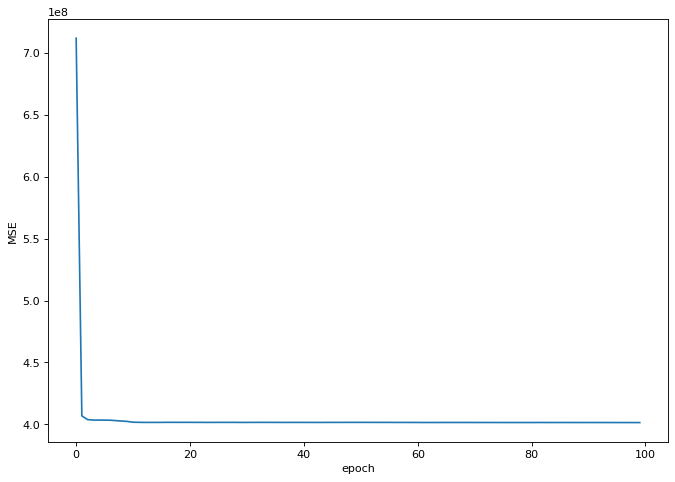

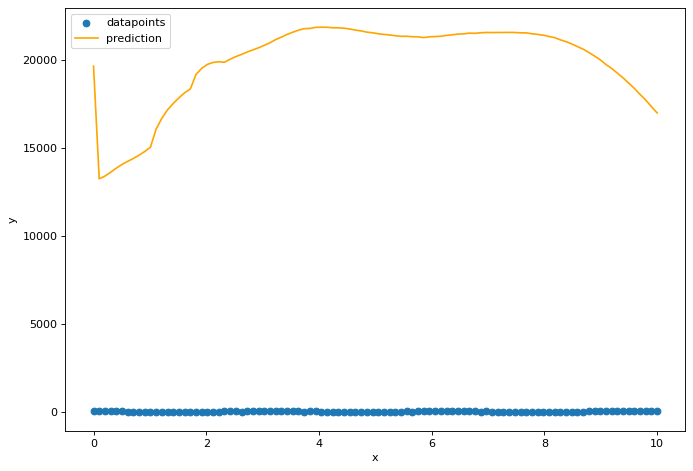

In [ ]:
test_quant_current(D, 4, STD, curr_matrices['4'], EPOCH, x, xencoded, y, lr=0.0001)